# Example Jupyter Notebook

Here I present an exemple of how to use DustyPY. In this tutorial we will use Betelgeuse as an exemple.

### Set up a Model

The first thing to do is to create your model. In the case of Betelgeuse, we have a single star with a Temperature around 3500 K:


In [1]:
from DustyPY.stars import Star

S = Star(Name='E1',Temperature=3500,Luminosity=1)

Note: For a single star, the Luminosity must always be 1 as it is the contribution of this star to the total luminosity of the model.

Then we need to create the dust around. We refer to this paper for the dust composition and grain size distribution [Cannon et al. 2023](https://ui.adsabs.harvard.edu/abs/2023A&A...675A..46C)

In [2]:
from DustyPY.stars import Dust

Composition = {'Al2O3-comp':0.2,'MgFeSiO4':0.16,'Ca2Al2SiO7':0.64}
DustSize = {'amin' : 0.01, 'amax': 1}  #Size in microns
tau = 1 #Optical depth of the dust shell at 0.55 microns to be fitted
DustSize={'Distribution': 'MODIFIED_MRN', 'amin': 0.01, 'amax': 1} #Dust size distribution
Sublimation=1200 #Sublimation temperature of the dust in Kelvin
Properties='common_and_addl_grain_composite' #Properties of the dust (see DustyPY documentation)

dust = Dust(Composition=Composition, DustSize=DustSize, tau=tau, Sublimation=Sublimation, Properties=Properties)

With this we can create our model with a distance of 197 pc [Graham et al. 2008](https://iopscience.iop.org/article/10.1088/0004-6256/135/4/1430):

In [3]:
from DustyPY.stars import Model

name = 'Betelgeuse' #Name of the model
NbStar=1 #Number of stars
Stars=[S] #List of stars
Dust=dust #Dust properties
distance=197.0 #Distance in parsecs
Spectral='black_body' #Spectral type of the star (see DustyPY documentation)
SpectralFile='kurucz10.dat' #File containing the spectral sphae of the star if Spectral='file_f_lambda', 'file_lambda_f_lambda' or 'file_f_nu'
SiOAbsorption=10 #SiO absorption in the dust shell in percent (only with Spectral='engelke_marengo')

model = Model(Name='Betelgeuse', NbStar=1, Stars=[S], Dust=dust, distance = 197.0, Spectral=Spectral, SpectralFile=SpectralFile,SiOAbsorption=SiOAbsorption) 

Then we need to create the dusty object and give him the dusty PATH on your machine and the model:

In [4]:
from DustyPY.dusty import Dusty

Path = '/Users/gabriel/Documents/These/Recherche/lib/dusty/release/dusty' #Replace with the path to the dusty directory

dusty = Dusty(PATH=Path, Model=model,Lestimation=1.8e5)

### Add the data

Once the dusty file is set with the model, we can import the data. To do this you can either import your own data like follow:

In [ ]:
from DustyPY.Data import Data

data = Data()

d = data.import_data('Path_to_Data') #Replace with the path to the data

data.set_xdata(xdata) #Replace with the x data, Wavelength in microns
data.set_ydata(ydata) #Replace with the y data, Flux in W/m2 or Jy
data.set_yerr(yerr)

Or you can use the built in querry to reitrive the photometry from Vizier:

In [5]:
from DustyPY.Data import Data
Dat = Data()

table = Dat.querry_vizier_data(radius = 5, target='Betelgeuse')
Dat.set_vizier_data(table)
print(table)

 _RAJ2000   _DEJ2000          _tabname        ...  sed_flux sed_eflux sed_filter
   deg        deg                             ...     Jy        Jy              
---------- ---------- ----------------------- ... --------- --------- ----------
 88.792920   7.406897            I/238A/picat ...   2.3e+03        --  Johnson:V
 88.792939   7.407063          I/239/hip_main ...   2.4e+03        --  Johnson:V
 88.792939   7.407063          I/239/hip_main ...  1.85e+03        30     HIP:VT
 88.792939   7.407063          I/239/hip_main ...       286         2     HIP:BT
 88.792939   7.407063          I/239/hip_main ...  2.37e+03        50     HIP:Hp
 88.792940   7.407061          I/239/tyc_main ...  2.15e+03        --  Johnson:V
 88.792940   7.407061          I/239/tyc_main ...  1.85e+03        30     HIP:VT
 88.792940   7.407061          I/239/tyc_main ...       286         2     HIP:BT
 88.792937   7.407064          I/270/cpirss01 ...      95.9        --   IRAS:100
       ...        ...       

If needed, you can restrict the data to a subset using the method RestrictData():

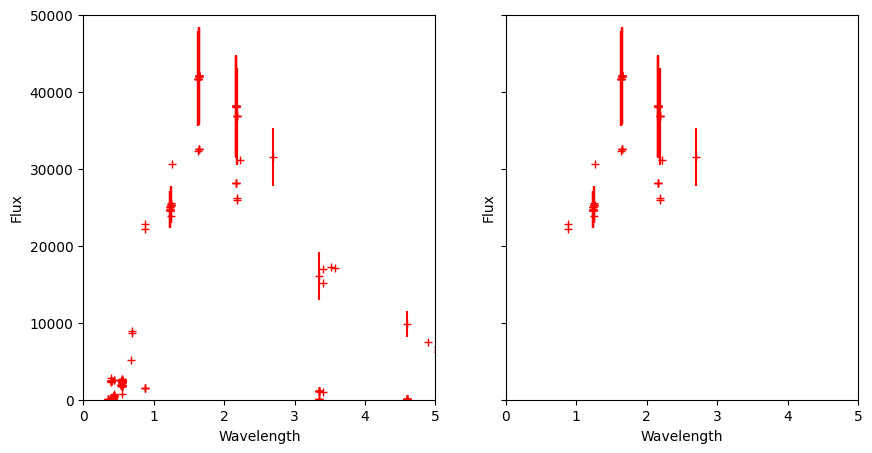

In [6]:
import matplotlib.pyplot as plt

fig,(ax1,ax2) = plt.subplots(1,2, sharey=True,figsize=(10,5))

Dat.scatter_data(xlim=(0,5),ylim=(0,5e4), ax=ax1, kwargs={'fmt':'+', 'color':'r'})
Dat.restrict_data(['ydata > 20000'])
Dat.scatter_data(xlim=(0,5),ylim=(0,5e4), ax=ax2, kwargs={'fmt':'+', 'color':'r'})


You can also unred the data using the Fitzpatrick parameterization ([Fitzpatrick et al. 1999](https://ui.adsabs.harvard.edu/abs/1999PASP..111...63F))

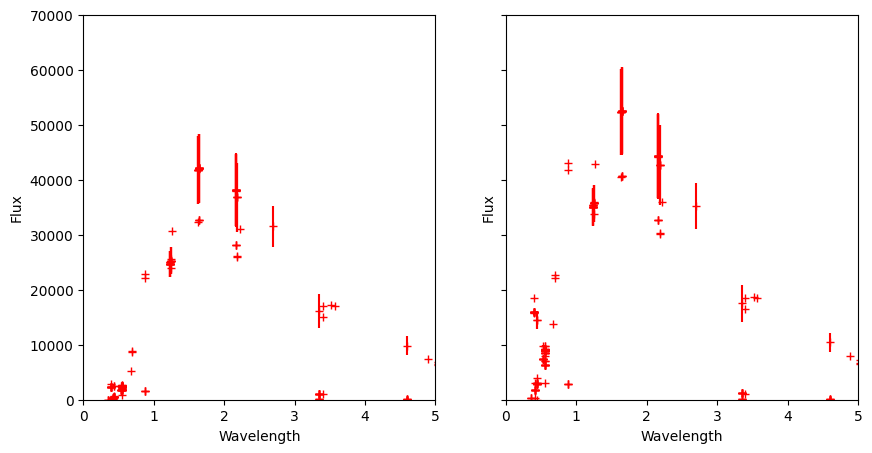

In [7]:
fig,(ax1,ax2) = plt.subplots(1,2, sharey=True,figsize=(10,5))

Dat.set_vizier_data(table)
Dat.scatter_data(xlim=(0,5),ylim=(0,7e4), ax=ax1, kwargs={'fmt':'+', 'color':'r'})
Dat.unred_data(EBV=0.470)
Dat.scatter_data(xlim=(0,5),ylim=(0,7e4), ax=ax2, kwargs={'fmt':'+', 'color':'r'})


you can increase the number of wavelengths used by dusty to be more preciser on your SED (more wavelength = slower). Default is 119

In [8]:
dusty.make_wavelength(1000)

### Lunch Model

Once the model is setup, you can lunch dusty and extract the results.

 Found master input file model.mas on on command line.
 Grain:  1 Sublimation Temperature:    1200.000
 Inner Boundary Temperature of fiducial Grain(  1)=  800.00
 aveV:   1.8849744943524814E-004 a3ave/Cnorm:   4.5000450004499907E-005
 COMPOSITE GRAIN
 -------------------------------
          15
 Done with prOut
 ellapsed time:           2 [s]


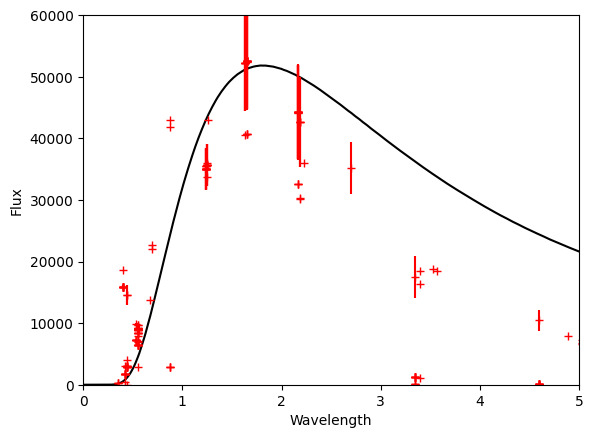

In [9]:
#Change the parameter file and lunch dusty
dusty.change_parameter()
dusty.lunch_dusty(verbose=0)


#Retrieve the results SED and plot it
dusty.make_SED(distance=dusty.get_Model().get_Distance())

fig,ax = plt.subplots()
dusty.plot_SED(xlim=(0,5),ylim=(0,6e4), ax=ax, kwargs={'color':'k'})
Dat.scatter_data(xlim=(0,5),ylim=(0,6e4), ax=ax, kwargs={'fmt':'+', 'color':'r'})

### Fit Model

Finaly, DustyPY offer a convenient way to fit a model to the data using the librarie [pymcmcstat](https://github.com/prmiles/pymcmcstat.git).

In [10]:
#Querry the data
table = Dat.querry_vizier_data(radius = 5, target='Betelgeuse')
Dat.set_vizier_data(table)
Dat.unred_data(EBV=0.470)

#To fit data the error must be different from 0 so we restrict the data
Dat.restrict_data(['yerr != 0.'])

In [11]:
from DustyPY.DustyFit import DustyFit

# Modify the wavelength of the model to be faster
dusty.make_wavelength(200)

#Initialize the DustyFit object
fit = DustyFit(dusty, data=Dat)

#Initialize the Parameter to Fit
#For the Temperature/Luminosity of the stars, always put the number of the star, 
# in the same order as the listed stars, after Temp ex: Temp1, Lum1, Temp2, Lum2,...)
Param = {'Temp1':{'theta0':3500,'minimum':2000,'maximum':4000}, 
         'Opacity':{'theta0':1,'minimum':0.1,'maximum':4},
         'Lest':{'theta0':1,'minimum':0,'maximum':10}, #Mandatory, fit the Lestimation (Luminosity = Lest*Lestimation)
    }

#Initialize the parameter of the MCMC
ParamFit = {
                        'nsimu': 100,         #Number of iteration (larger is better but slow due to the dusty runtime)   
                        'updatesigma': True,  #Update the sigma of the likelihood function
                        'method': 'dram',     #Sampling method
                        'adaptint': 100,      #Number of interates between adaptation.
                        'verbosity': 0,       #0=No output, 1=Output
                        'waitbar': True,      #Display a waitbar
                    }

#Set the parameters
fit.set_Param(Param)
fit.set_ParamFit(ParamFit)

#Run the MCMC and get results
fit.lunch_fit()
fit.get_Fit().print_results()

 Found master input file model.mas on on command line.
 Grain:  1 Sublimation Temperature:    1200.000
 Inner Boundary Temperature of fiducial Grain(  1)=  800.00
 aveV:   1.8849744943524814E-004 a3ave/Cnorm:   4.5000450004499907E-005
 COMPOSITE GRAIN
 -------------------------------
          15
 Done with prOut
 ellapsed time:           0 [s]
 Found master input file model.mas on on command line.
 Grain:  1 Sublimation Temperature:    1200.000
 Inner Boundary Temperature of fiducial Grain(  1)=  800.00
 aveV:   1.8849744943524814E-004 a3ave/Cnorm:   4.5000450004499907E-005
 COMPOSITE GRAIN
 -------------------------------
          15
 Done with prOut
 ellapsed time:           0 [s]
 [-                 4%                  ] 4 of 100 complete in 0.6 sec Found master input file model.mas on on command line.
 Grain:  1 Sublimation Temperature:    1200.000
 Inner Boundary Temperature of fiducial Grain(  1)=  800.00
 aveV:   1.8849744943524814E-004 a3ave/Cnorm:   4.5000450004499907E-005
 



------------------------------
      name:      mean       std    MC_err       tau    geweke
     Temp1:   3952.23     33.94      9.34      1.91      0.99
   Opacity:      0.64      0.05      0.02      5.99      0.99
      Lest:      1.02      0.04      0.02      5.40      0.88
------------------------------
Acceptance rate information
---------------
Results dictionary:
Stage 1: 22.00%
Stage 2: 41.00%
Net    : 63.00% -> 63/100
---------------
Chain provided:
Net    : 64.00% -> 32/50
---------------
Note, the net acceptance rate from the results dictionary
may be different if you only provided a subset of the chain,
e.g., removed the first part for burnin-in.
------------------------------
 Found master input file model.mas on on command line.
 Grain:  1 Sublimation Temperature:    1200.000
 Inner Boundary Temperature of fiducial Grain(  1)=  800.00
 aveV:   1.8849744943524814E-004 a3ave/Cnorm:   4.5000450004499907E-005
 COMPOSITE GRAIN
 -------------------------------
 Done with get

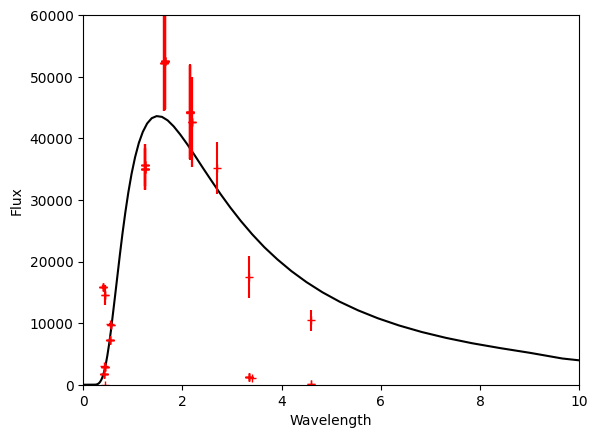

In [12]:
fig,ax = plt.subplots()

fit.plot_results(xlim=(0,10),ylim=(0,6e4), ax=ax, kwargs_fit={'color':'k'}, kwargs_data={'fmt':'+', 'color':'r'})